<a href="https://colab.research.google.com/github/dahlia52/Commercial-District-Analysis/blob/main/code/clustering1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#matplotlib 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (12.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122352 files and dir

In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/광진구팟/Data/상권분석/sales_for_클러스터링.csv') ### 세은 : 경로 외 코드 수정 없음

In [ ]:
sales.head()

,행정동명,상권_코드_명,총_매출_금액,대표_업종,대표_업종_매출_금액,대표_업종_비율,육류판매,애완동물,일식음식점,세탁소,...,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,상권_구분_코드_명
0,구의제3동,강변역(테크노마트),3.321523e+11,"['컴퓨터및주변장치판매', '전자상거래업', '핸드폰', '가전제품', '일반의류']",265838316888,80.035060,0,0,0,0,...,1778344703,1.462938e+11,9.856076e+10,1398831447,29746447479,5.526001e+10,6.455620e+10,5.663524e+10,3.725784e+10,발달상권
1,화양동,건대입구역 1번,1.166689e+10,"['한식음식점', '호프-간이주점', '편의점', '치킨전문점', '노래방']",10540141878,90.342338,0,0,0,0,...,3395111351,6.457942e+09,4.067236e+09,156749198,4266045811,2.615671e+09,1.401982e+09,1.335441e+09,7.492886e+08,골목상권
2,자양제4동,건대입구역 6번,6.656748e+10,"['중식음식점', '반찬가게', '편의점', '한식음식점', '의약품']",48880654750,73.430231,0,0,0,0,...,13051167217,3.662941e+10,2.674311e+10,548767966,19643661749,1.584273e+10,1.092390e+10,1.014919e+10,6.264271e+09,골목상권
3,화양동,건대입구역(건대),3.524325e+11,"['한식음식점', '커피-음료', '일반의원', '일반의류', '호프-간이주점']",199745066665,56.676113,0,0,0,0,...,52309947213,1.555370e+11,1.851034e+11,9422322974,138253740433,7.910771e+10,4.987117e+10,4.337508e+10,2.061029e+10,발달상권
4,광장동,광나루역 1번,1.770376e+10,"['한식음식점', '편의점', '중식음식점', '치과의원', '커피-음료']",13630875676,76.994222,0,0,0,0,...,2021624754,1.013996e+10,6.160345e+09,101322474,1813699794,2.662737e+09,4.041911e+09,4.477682e+09,3.202955e+09,골목상권


In [ ]:
sales['상권_구분_코드_명'].value_counts()

골목상권    42
전통시장    10
발달상권     9
Name: 상권_구분_코드_명, dtype: int64

In [ ]:
# 범주형 변수 라벨인코딩
sales['상권_구분_코드_명'] = sales['상권_구분_코드_명'].map({'발달상권':0, '골목상권':1, '전통시장':2})

### 클러스터링

In [ ]:
index = [2] + list(range(4,67))

In [ ]:
sales.iloc[:,index]

,총_매출_금액,대표_업종_매출_금액,대표_업종_비율,육류판매,애완동물,일식음식점,세탁소,일반의류,치킨전문점,한식음식점,...,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,상권_구분_코드_명
0,3.321523e+11,265838316888,80.035060,0,0,0,0,1,0,0,...,1778344703,1.462938e+11,9.856076e+10,1398831447,29746447479,5.526001e+10,6.455620e+10,5.663524e+10,3.725784e+10,0
1,1.166689e+10,10540141878,90.342338,0,0,0,0,0,1,1,...,3395111351,6.457942e+09,4.067236e+09,156749198,4266045811,2.615671e+09,1.401982e+09,1.335441e+09,7.492886e+08,1
2,6.656748e+10,48880654750,73.430231,0,0,0,0,0,0,1,...,13051167217,3.662941e+10,2.674311e+10,548767966,19643661749,1.584273e+10,1.092390e+10,1.014919e+10,6.264271e+09,1
3,3.524325e+11,199745066665,56.676113,0,0,0,0,1,0,1,...,52309947213,1.555370e+11,1.851034e+11,9422322974,138253740433,7.910771e+10,4.987117e+10,4.337508e+10,2.061029e+10,0
4,1.770376e+10,13630875676,76.994222,0,0,0,0,0,0,1,...,2021624754,1.013996e+10,6.160345e+09,101322474,1813699794,2.662737e+09,4.041911e+09,4.477682e+09,3.202955e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,6.979311e+09,4991983374,71.525450,1,0,0,0,0,0,0,...,785036232,3.555122e+09,3.195968e+09,83493294,888719048,1.194932e+09,1.617479e+09,1.796380e+09,1.170086e+09,1
57,6.788171e+09,5135408297,75.652311,0,0,0,0,0,0,0,...,478710635,3.634647e+09,3.073858e+09,154557151,2594093421,1.289808e+09,7.728886e+08,1.223820e+09,6.733370e+08,2
58,1.138369e+10,7015156358,61.624603,0,0,0,0,0,0,1,...,970639426,5.791566e+09,5.341118e+09,25146557,1134301796,2.205770e+09,2.160780e+09,3.073610e+09,2.533076e+09,1
59,2.838047e+10,23931152625,84.322621,0,0,0,1,0,0,1,...,6138840331,1.602489e+10,1.001184e+10,568765549,10184242017,6.457951e+09,3.643977e+09,3.543810e+09,1.637981e+09,1


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(sales.iloc[:,index])

In [ ]:
### 여기부터 세은 추가
temp = pd.DataFrame(scaled, columns = list(sales.iloc[:,index].columns))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

sse = {}
for k in range(1,20):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300).fit(temp)
  temp['label'] = kmeans.labels_
  sse[k] = kmeans.inertia_

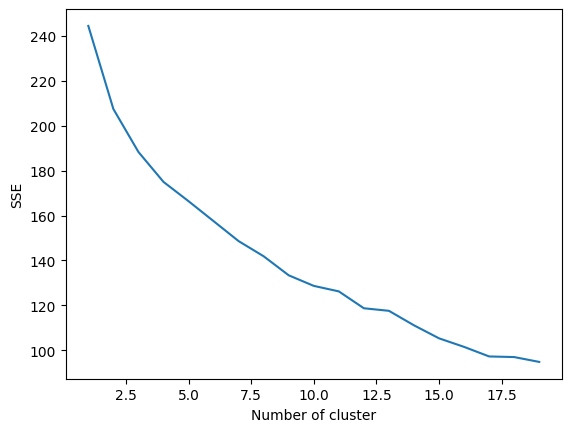

In [ ]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show() ### 여기까지 세은 추가

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300)
kmeans.fit(scaled)
kmeans_labels = kmeans.labels_

score_samples = silhouette_samples(scaled, kmeans_labels)
average_score = silhouette_score(scaled, kmeans_labels)

In [ ]:
kmeans_labels

array([6, 4, 0, 5, 4, 4, 4, 0, 4, 2, 4, 7, 2, 7, 7, 1, 4, 7, 2, 1, 0, 1,
       2, 2, 0, 1, 4, 1, 0, 0, 3, 1, 2, 7, 0, 3, 2, 4, 4, 1, 7, 7, 0, 1,
       0, 0, 4, 3, 3, 2, 3, 0, 3, 4, 0, 0, 2, 0, 0, 3, 1], dtype=int32)

In [ ]:
kmeans_labels

array([6, 4, 0, 5, 4, 4, 4, 0, 4, 2, 4, 7, 2, 7, 7, 1, 4, 7, 2, 1, 0, 1,
       2, 2, 0, 1, 4, 1, 0, 0, 3, 1, 2, 7, 0, 3, 2, 4, 4, 1, 7, 7, 0, 1,
       0, 0, 4, 3, 3, 2, 3, 0, 3, 4, 0, 0, 2, 0, 0, 3, 1], dtype=int32)

In [ ]:
sales['clustering'] = kmeans_labels

In [ ]:
pd.DataFrame(sales.groupby(['상권_구분_코드_명','clustering']).count()['행정동명'])

행정동명
상권_구분_코드_명 clustering      
0          2              1
           5              1
           6              1
           7              6
1          0             12
           1              3
           2              8
           3              6
           4             12
           7              1
2          0              3
           1              6
           3              1

In [ ]:
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

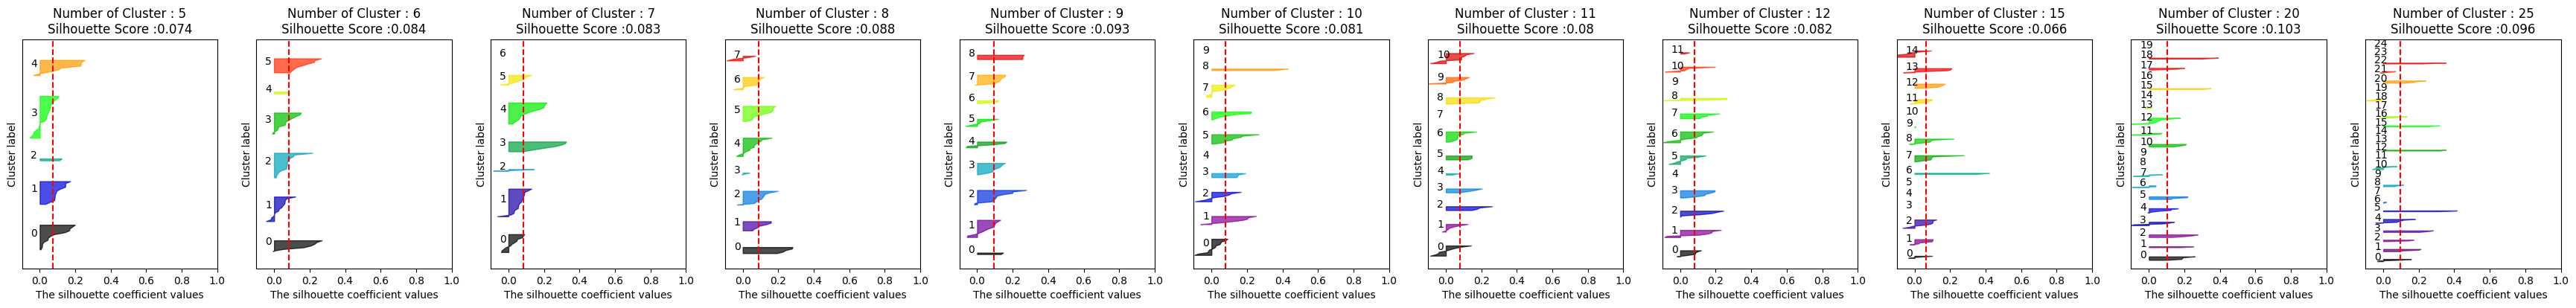

In [ ]:
visualize_silhouette([5,6,7,8,9,10,11,12,15,20,25], scaled)

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 2, min_samples = 3, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(scaled)

In [ ]:
dbscan_labels

array([-1, -1,  0, -1, -1, -1, -1,  0, -1,  1, -1,  0, -1, -1,  0, -1, -1,
        0, -1, -1, -1,  1,  2,  1,  0,  1, -1,  1,  0,  0, -1,  1,  1,  0,
        0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  2, -1,
        0, -1,  2, -1, -1, -1, -1,  0, -1, -1])

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled, dbscan_labels, metric = 'euclidean')

-0.021735335012862147

- 상권 유형별로 클러스터링

- 발달상권

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_발달 = scaler.fit_transform(sales[sales.상권_구분_코드_명 == 0].iloc[:,index])

In [ ]:
### 여기부터 세은 추가
temp = pd.DataFrame(scaled_발달, columns = list(sales.iloc[:,index].columns))

sse = {}
for k in range(1,10):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300).fit(temp)
  temp['label'] = kmeans.labels_
  sse[k] = kmeans.inertia_

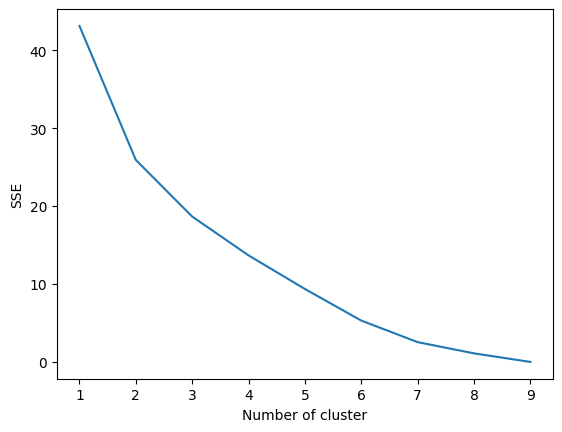

In [ ]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show() ### 여기까지 세은 추가

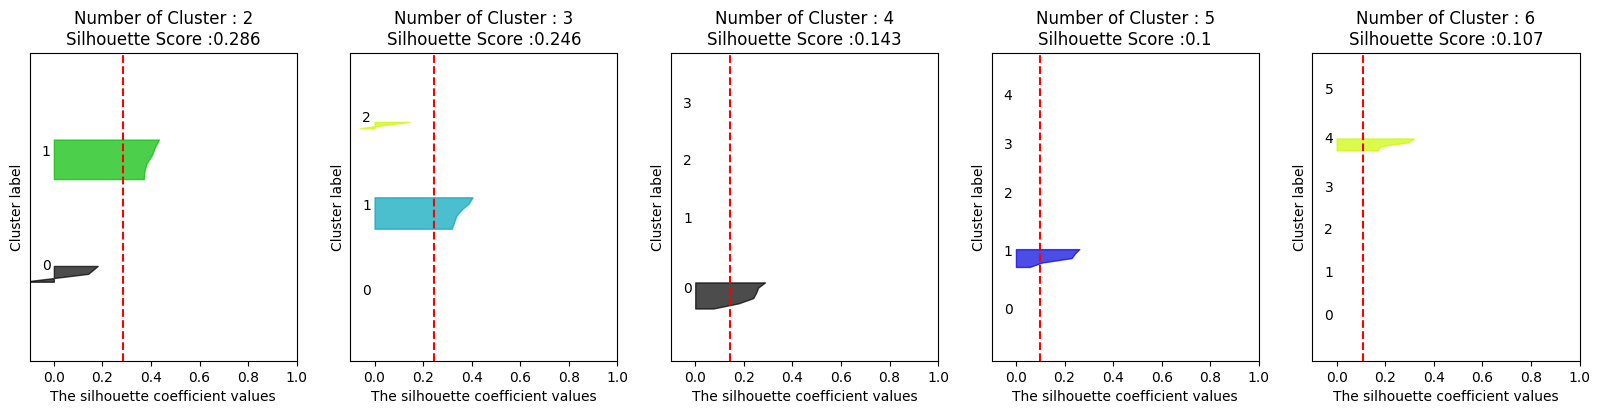

In [ ]:
visualize_silhouette([2,3,4,5,6], scaled_발달)

- 골목상권

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_골목 = scaler.fit_transform(sales[sales.상권_구분_코드_명 == 1].iloc[:,index])

In [ ]:
### 여기부터 세은 추가
temp = pd.DataFrame(scaled_골목, columns = list(sales.iloc[:,index].columns))

sse = {}
for k in range(1,10):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300).fit(temp)
  temp['label'] = kmeans.labels_
  sse[k] = kmeans.inertia_

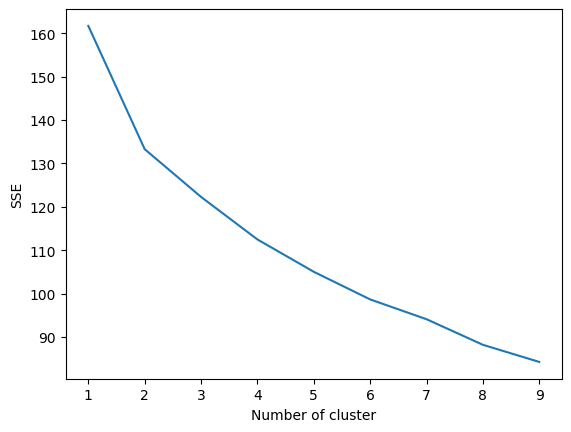

In [ ]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show() ### 여기까지 세은 추가

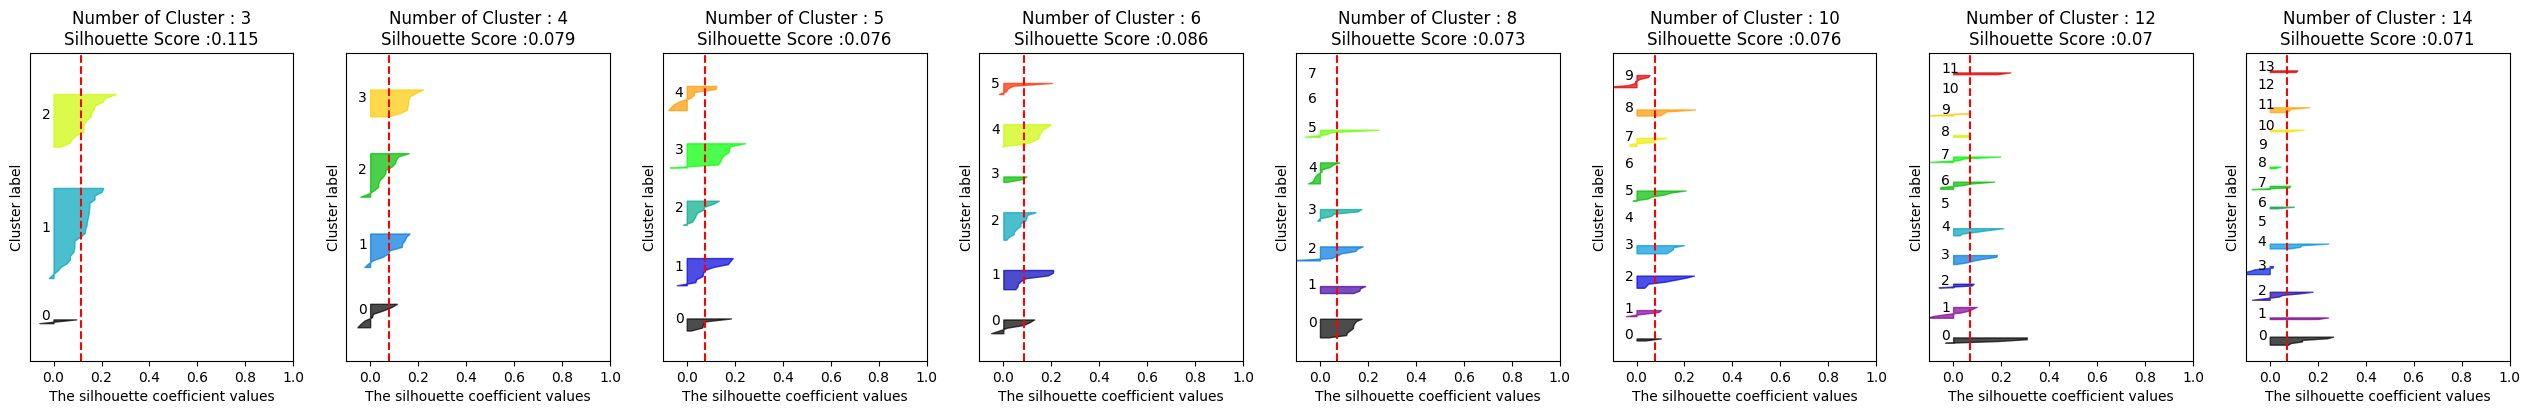

In [ ]:
visualize_silhouette([3,4,5,6,8,10,12,14], scaled_골목)

- 전통시장

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_전통 = scaler.fit_transform(sales[sales.상권_구분_코드_명 == 2].iloc[:,index])

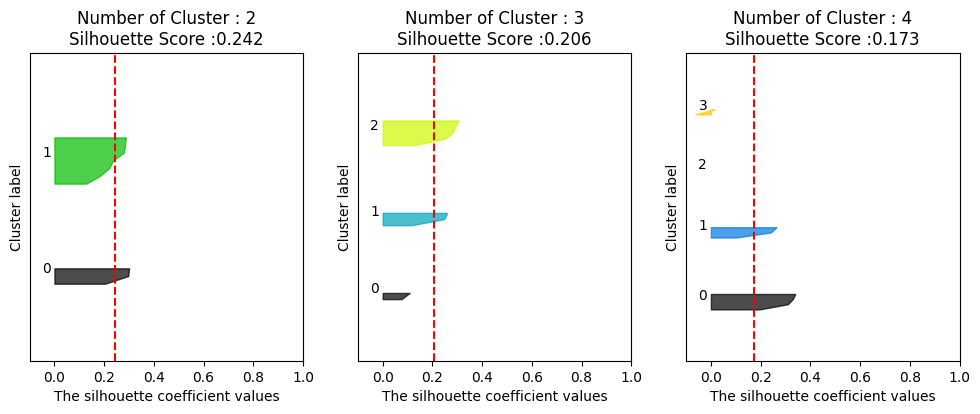

In [ ]:
visualize_silhouette([2,3,4], scaled_전통)

## PCA

In [ ]:
sales.head()

,행정동명,상권_코드_명,총_매출_금액,대표_업종,대표_업종_매출_금액,대표_업종_비율,육류판매,애완동물,일식음식점,세탁소,...,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,상권_구분_코드_명
0,구의제3동,강변역(테크노마트),3.321523e+11,"['컴퓨터및주변장치판매', '전자상거래업', '핸드폰', '가전제품', '일반의류']",265838316888,80.035060,0,0,0,0,...,1778344703,1.462938e+11,9.856076e+10,1398831447,29746447479,5.526001e+10,6.455620e+10,5.663524e+10,3.725784e+10,0
1,화양동,건대입구역 1번,1.166689e+10,"['한식음식점', '호프-간이주점', '편의점', '치킨전문점', '노래방']",10540141878,90.342338,0,0,0,0,...,3395111351,6.457942e+09,4.067236e+09,156749198,4266045811,2.615671e+09,1.401982e+09,1.335441e+09,7.492886e+08,1
2,자양제4동,건대입구역 6번,6.656748e+10,"['중식음식점', '반찬가게', '편의점', '한식음식점', '의약품']",48880654750,73.430231,0,0,0,0,...,13051167217,3.662941e+10,2.674311e+10,548767966,19643661749,1.584273e+10,1.092390e+10,1.014919e+10,6.264271e+09,1
3,화양동,건대입구역(건대),3.524325e+11,"['한식음식점', '커피-음료', '일반의원', '일반의류', '호프-간이주점']",199745066665,56.676113,0,0,0,0,...,52309947213,1.555370e+11,1.851034e+11,9422322974,138253740433,7.910771e+10,4.987117e+10,4.337508e+10,2.061029e+10,0
4,광장동,광나루역 1번,1.770376e+10,"['한식음식점', '편의점', '중식음식점', '치과의원', '커피-음료']",13630875676,76.994222,0,0,0,0,...,2021624754,1.013996e+10,6.160345e+09,101322474,1813699794,2.662737e+09,4.041911e+09,4.477682e+09,3.202955e+09,1


In [ ]:
sales_pca = sales.iloc[:,1:3]
sales_pca_발달 = sales.iloc[:,1:3]
sales_pca_골목 = sales.iloc[:,1:3]
sales_pca_전통 = sales.iloc[:,1:3]

sales_pca['상권_구분_코드_명'] = sales['상권_구분_코드_명']
sales_pca_발달['상권_구분_코드_명'] = sales['상권_구분_코드_명']
sales_pca_골목['상권_구분_코드_명'] = sales['상권_구분_코드_명']
sales_pca_전통['상권_구분_코드_명'] = sales['상권_구분_코드_명']

sales_pca_발달 = sales_pca_발달[sales_pca_발달.상권_구분_코드_명 == 0]
sales_pca_골목 = sales_pca_골목[sales_pca_골목.상권_구분_코드_명 == 1]
sales_pca_전통 = sales_pca_전통[sales_pca_전통.상권_구분_코드_명 == 2]

sales_pca_발달.reset_index(inplace = True, drop = True)
sales_pca_골목.reset_index(inplace = True, drop = True)
sales_pca_전통.reset_index(inplace = True, drop = True)

sales_pca_발달.drop(['상권_구분_코드_명'], axis=1, inplace = True)
sales_pca_골목.drop(['상권_구분_코드_명'], axis=1, inplace = True)
sales_pca_전통.drop(['상권_구분_코드_명'], axis=1, inplace = True)

In [ ]:
print(sales_pca_발달.shape)
print(sales_pca_골목.shape)
print(sales_pca_전통.shape)

(9, 2)
(42, 2)
(10, 2)


### 전체 상권

In [ ]:
sales_pca

,상권_코드_명,총_매출_금액,상권_구분_코드_명
0,강변역(테크노마트),3.321523e+11,0
1,건대입구역 1번,1.166689e+10,1
2,건대입구역 6번,6.656748e+10,1
3,건대입구역(건대),3.524325e+11,0
4,광나루역 1번,1.770376e+10,1
...,...,...,...
56,푸른동산공원,6.979311e+09,1
57,한아름시장,6.788171e+09,2
58,해오름공원,1.138369e+10,1
59,화양사거리,2.838047e+10,1


In [ ]:
# MinMaxScaler 적용
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_pca = scaler.fit_transform(sales.iloc[:,50:66])
sales_pca['총_매출_금액'] = scaler.fit_transform(pd.DataFrame(sales_pca['총_매출_금액']))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
sales_pca['요일'] = pca.fit_transform(scaled_pca[:,0:2])
sales_pca['시간'] = pca.fit_transform(scaled_pca[:,2:8])
sales_pca['성별'] = pca.fit_transform(scaled_pca[:,8:10])
sales_pca['연령대'] = pca.fit_transform(scaled_pca[:,10:16])

In [ ]:
# 업종 열과 결합
sales_pca = pd.concat([sales_pca, sales.iloc[:,6:49]], axis = 1)

In [ ]:
sales_pca.head()

,상권_코드_명,총_매출_금액,상권_구분_코드_명,요일,시간,성별,연령대,육류판매,애완동물,일식음식점,...,네일숍,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원
0,강변역(테크노마트),0.942356,0,1.194919,1.439906,0.908036,1.500814,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,건대입구역 1번,0.031419,1,-0.111946,-0.171505,-0.111554,-0.203483,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,건대입구역 6번,0.187467,1,0.119238,0.150369,0.116309,0.112441,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,건대입구역(건대),1.000000,0,1.257131,1.733012,1.251781,1.622176,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,광나루역 1번,0.048578,1,-0.087050,-0.136793,-0.086067,-0.135867,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

sse = {}
for k in range(1,20):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300).fit(sales_pca.iloc[:,1:])
  sse[k] = kmeans.inertia_

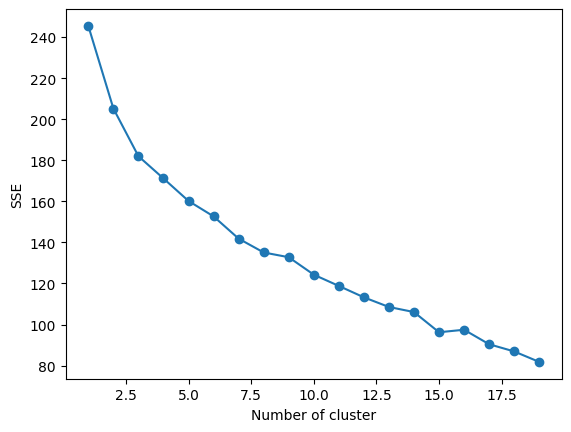

In [ ]:
plt.figure()
plt.scatter(list(sse.keys()), list(sse.values()))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show() # 군집 3개

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300).fit(scaled_pca)
sales_pca['label'] = kmeans.labels_

In [ ]:
pd.DataFrame(sales_pca.groupby(['상권_구분_코드_명','label']).count()['요일'])

요일
상권_구분_코드_명 label    
0          1       3
           2       6
1          0      42
2          0      10

### 발달상권

In [ ]:
sales_pca_발달

,상권_코드_명,총_매출_금액
0,강변역(테크노마트),3.321523e+11
1,건대입구역(건대),3.524325e+11
2,구삼강변맛길,1.063169e+11
3,구의사거리,7.904912e+10
4,구의역,1.418564e+11
5,군자역,2.467650e+11
6,아차산역,1.323559e+11
7,어린이대공원역,8.563639e+10
8,올림픽대교북단,1.160348e+11


In [ ]:
# MinMaxScaler 적용
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_pca_발달 = scaler.fit_transform(sales[sales.상권_구분_코드_명 == 0].iloc[:,50:66].reset_index(drop = True))
sales_pca_발달['총_매출_금액'] = scaler.fit_transform(pd.DataFrame(sales_pca_발달['총_매출_금액']))

In [ ]:
sales_pca_발달

,상권_코드_명,총_매출_금액
0,강변역(테크노마트),0.925818
1,건대입구역(건대),1.000000
2,구삼강변맛길,0.099742
3,구의사거리,0.000000
4,구의역,0.229741
5,군자역,0.613482
6,아차산역,0.194989
7,어린이대공원역,0.024095
8,올림픽대교북단,0.135289


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
sales_pca_발달['요일'] = pca.fit_transform(scaled_pca_발달[:,0:2])
sales_pca_발달['시간'] = pca.fit_transform(scaled_pca_발달[:,2:8])
sales_pca_발달['성별'] = pca.fit_transform(scaled_pca_발달[:,8:10])
sales_pca_발달['연령대'] = pca.fit_transform(scaled_pca_발달[:,10:16])

In [ ]:
# 업종 열과 결합
sales_pca_발달 = pd.concat([sales_pca_발달, sales[sales.상권_구분_코드_명 == 0].iloc[:,6:49].reset_index(drop = True)], axis = 1)

In [ ]:
sales_pca_발달

,상권_코드_명,총_매출_금액,요일,시간,성별,연령대,육류판매,애완동물,일식음식점,세탁소,...,네일숍,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원
0,강변역(테크노마트),0.925818,0.820779,0.802139,0.512732,0.756168,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,건대입구역(건대),1.000000,0.902570,1.102018,0.922416,1.072900,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,구삼강변맛길,0.099742,-0.351150,-0.453716,-0.328008,-0.370924,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,구의사거리,0.000000,-0.510454,-0.507710,-0.481319,-0.652178,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,구의역,0.229741,-0.190457,-0.175416,-0.133067,-0.223972,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,군자역,0.613482,0.328268,0.537062,0.409868,0.602754,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,아차산역,0.194989,-0.222610,-0.295542,-0.187626,-0.198940,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,어린이대공원역,0.024095,-0.457177,-0.623800,-0.434808,-0.716578,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,올림픽대교북단,0.135289,-0.319769,-0.385035,-0.280189,-0.269230,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

sse = {}
for k in range(1,5):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300).fit(sales_pca_발달.iloc[:,1:])
  sse[k] = kmeans.inertia_

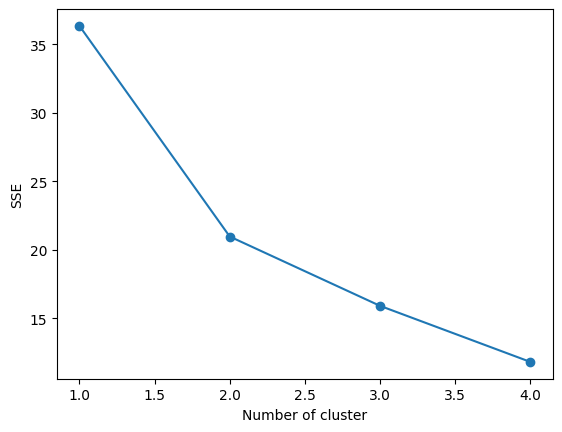

In [ ]:
plt.figure()
plt.scatter(list(sse.keys()), list(sse.values()))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show() # 군집 2개가 적당

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300).fit(scaled_pca_발달)
sales_pca_발달['label'] = kmeans.labels_

In [ ]:
sales_pca_발달

,상권_코드_명,총_매출_금액,요일,시간,성별,연령대,육류판매,애완동물,일식음식점,세탁소,...,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원,label
0,강변역(테크노마트),0.925818,0.820779,0.802139,0.512732,0.756168,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,건대입구역(건대),1.000000,0.902570,1.102018,0.922416,1.072900,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,구삼강변맛길,0.099742,-0.351150,-0.453716,-0.328008,-0.370924,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,구의사거리,0.000000,-0.510454,-0.507710,-0.481319,-0.652178,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,구의역,0.229741,-0.190457,-0.175416,-0.133067,-0.223972,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,군자역,0.613482,0.328268,0.537062,0.409868,0.602754,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,아차산역,0.194989,-0.222610,-0.295542,-0.187626,-0.198940,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7,어린이대공원역,0.024095,-0.457177,-0.623800,-0.434808,-0.716578,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,올림픽대교북단,0.135289,-0.319769,-0.385035,-0.280189,-0.269230,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


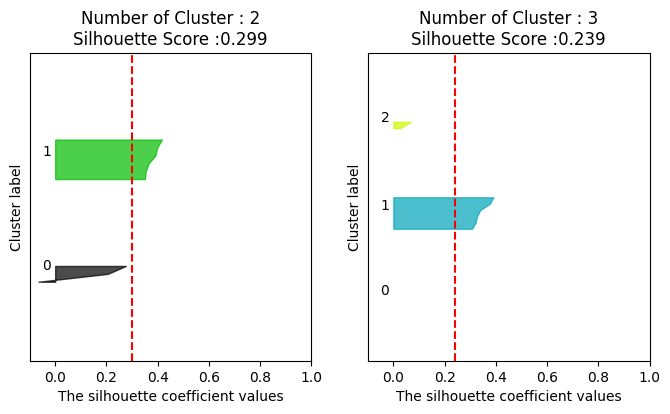

In [ ]:
visualize_silhouette([2,3], sales_pca_발달.iloc[:,1:49])

- 골목상권

In [ ]:
sales_pca_골목

,상권_코드_명,총_매출_금액
0,건대입구역 1번,1.166689e+10
1,건대입구역 6번,6.656748e+10
2,광나루역 1번,1.770376e+10
3,광진경찰서,2.539555e+09
4,광진구청,8.663238e+09
5,광진정말공원,2.469154e+10
6,광진정보도서관,3.247321e+10
7,광진초등학교,9.738513e+09
8,구남초등학교,8.864691e+09
9,구의1동주민센터,3.362525e+10


In [ ]:
# MinMaxScaler 적용
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_pca_골목 = scaler.fit_transform(sales[sales.상권_구분_코드_명 == 1].iloc[:,50:66].reset_index(drop = True))
sales_pca_골목['총_매출_금액'] = scaler.fit_transform(pd.DataFrame(sales_pca_골목['총_매출_금액']))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
sales_pca_골목['요일'] = pca.fit_transform(scaled_pca_골목[:,0:2])
sales_pca_골목['시간'] = pca.fit_transform(scaled_pca_골목[:,2:8])
sales_pca_골목['성별'] = pca.fit_transform(scaled_pca_골목[:,8:10])
sales_pca_골목['연령대'] = pca.fit_transform(scaled_pca_골목[:,10:16])

In [ ]:
# 업종 열과 결합
sales_pca_골목 = pd.concat([sales_pca_골목, sales[sales.상권_구분_코드_명 == 1].iloc[:,6:49].reset_index(drop = True)], axis = 1)

In [ ]:
sales_pca_골목

,상권_코드_명,총_매출_금액,요일,시간,성별,연령대,육류판매,애완동물,일식음식점,세탁소,...,네일숍,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원
0,건대입구역 1번,0.161559,-0.093733,-0.221092,-0.110977,-0.234236,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,건대입구역 6번,1.000000,1.092196,1.620786,1.087503,1.582955,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,광나루역 1번,0.253754,0.035060,0.039799,0.016527,0.074374,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,광진경찰서,0.022167,-0.288456,-0.520706,-0.291587,-0.504861,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,광진구청,0.115688,-0.163514,-0.287083,-0.176837,-0.257054,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,광진정말공원,0.360471,0.168847,0.337875,0.216038,0.397771,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,광진정보도서관,0.479313,0.350319,0.596291,0.283616,0.537777,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,광진초등학교,0.132109,-0.141606,-0.260409,-0.161376,-0.259384,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,구남초등학교,0.118764,-0.159098,-0.290470,-0.168685,-0.299325,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9,구의1동주민센터,0.496907,0.367966,0.528454,0.378658,0.670567,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

sse = {}
for k in range(1,15):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300).fit(sales_pca_골목.iloc[:,1:])
  sse[k] = kmeans.inertia_

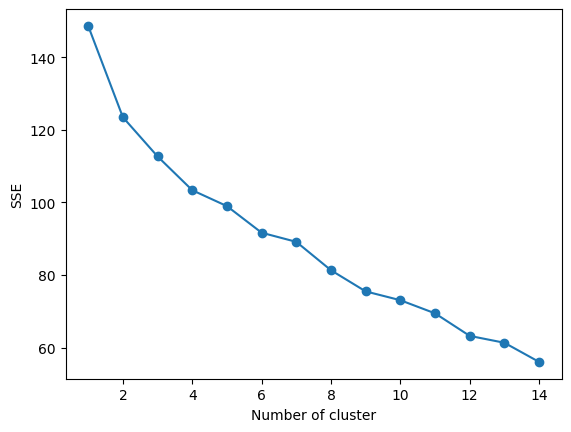

In [ ]:
plt.figure()
plt.scatter(list(sse.keys()), list(sse.values()))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show() # 군집 8개가 적당

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300).fit(scaled_pca_골목)
sales_pca_골목['label'] = kmeans.labels_

In [ ]:
sales_pca_골목

,상권_코드_명,총_매출_금액,요일,시간,성별,연령대,육류판매,애완동물,일식음식점,세탁소,...,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원,label
0,건대입구역 1번,0.161559,-0.093733,-0.221092,-0.110977,-0.234236,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,건대입구역 6번,1.000000,1.092196,1.620786,1.087503,1.582955,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,광나루역 1번,0.253754,0.035060,0.039799,0.016527,0.074374,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,광진경찰서,0.022167,-0.288456,-0.520706,-0.291587,-0.504861,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,광진구청,0.115688,-0.163514,-0.287083,-0.176837,-0.257054,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,광진정말공원,0.360471,0.168847,0.337875,0.216038,0.397771,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
6,광진정보도서관,0.479313,0.350319,0.596291,0.283616,0.537777,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,광진초등학교,0.132109,-0.141606,-0.260409,-0.161376,-0.259384,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,구남초등학교,0.118764,-0.159098,-0.290470,-0.168685,-0.299325,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,구의1동주민센터,0.496907,0.367966,0.528454,0.378658,0.670567,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2


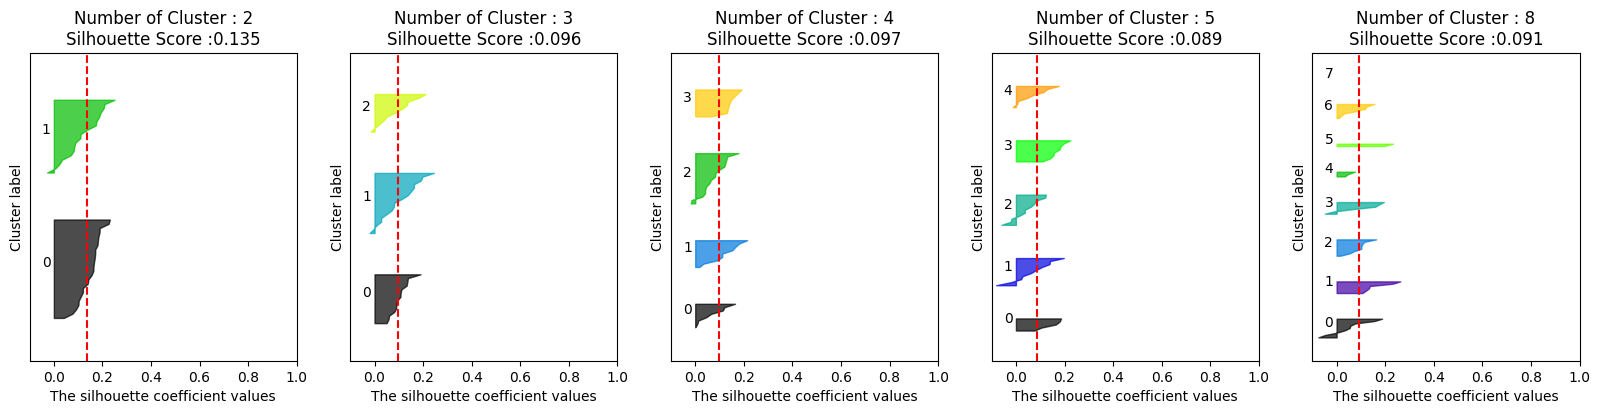

In [ ]:
visualize_silhouette([2,3,4,5,8], sales_pca_골목.iloc[:,1:49])

### 전통시장

In [ ]:
sales_pca_전통

,상권_코드_명,총_매출_금액
0,노룬산시장(노룬산골목시장),1.023344e+10
1,능동로골목시장,1.425883e+10
2,면곡골목시장,5.581784e+09
3,신성시장(신성골목시장),1.871705e+10
4,영동교골목시장,4.131292e+09
5,자양골목전통시장(자양골목시장),3.257029e+10
6,조양시장,6.130730e+08
7,"중곡제일시장(중곡제일골목시장, 광성시장)",5.520989e+10
8,한아름시장,6.788171e+09
9,화양제일골목시장,4.137117e+10


In [ ]:
# MinMaxScaler 적용
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_pca_전통 = scaler.fit_transform(sales[sales.상권_구분_코드_명 == 2].iloc[:,50:66].reset_index(drop = True))
sales_pca_전통['총_매출_금액'] = scaler.fit_transform(pd.DataFrame(sales_pca_전통['총_매출_금액']))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
sales_pca_전통['요일'] = pca.fit_transform(scaled_pca_전통[:,0:2])
sales_pca_전통['시간'] = pca.fit_transform(scaled_pca_전통[:,2:8])
sales_pca_전통['성별'] = pca.fit_transform(scaled_pca_전통[:,8:10])
sales_pca_전통['연령대'] = pca.fit_transform(scaled_pca_전통[:,10:16])

In [ ]:
# 업종 열과 결합
sales_pca_전통 = pd.concat([sales_pca_전통, sales[sales.상권_구분_코드_명 == 2].iloc[:,6:49].reset_index(drop = True)], axis = 1)

In [ ]:
sales_pca_전통

,상권_코드_명,총_매출_금액,요일,시간,성별,연령대,육류판매,애완동물,일식음식점,세탁소,...,네일숍,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원
0,노룬산시장(노룬산골목시장),0.176208,-0.218864,-0.364455,-0.230464,-0.379669,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,능동로골목시장,0.249937,-0.110015,-0.163054,-0.126192,-0.217024,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,면곡골목시장,0.091007,-0.344231,-0.520544,-0.354849,-0.514824,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,신성시장(신성골목시장),0.331594,-0.008335,-0.016901,-0.010522,-0.089504,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,영동교골목시장,0.064440,-0.380441,-0.577145,-0.386179,-0.573059,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,자양골목전통시장(자양골목시장),0.585331,0.381268,0.448294,0.345513,0.429429,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,조양시장,0.000000,-0.476076,-0.697327,-0.481193,-0.676571,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
7,"중곡제일시장(중곡제일골목시장, 광성시장)",1.000000,0.937922,1.260249,0.932122,1.193534,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,한아름시장,0.113104,-0.320242,-0.459946,-0.311720,-0.299627,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,화양제일골목시장,0.746529,0.539012,1.090830,0.623484,1.127315,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

sse = {}
for k in range(1,10):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300).fit(sales_pca_전통.iloc[:,1:])
  sse[k] = kmeans.inertia_

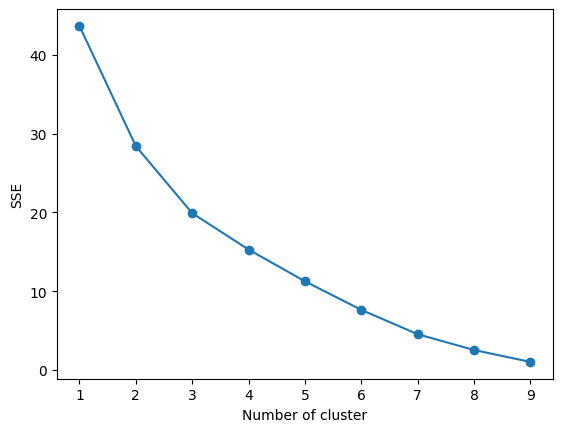

In [ ]:
plt.figure()
plt.scatter(list(sse.keys()), list(sse.values()))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show() # 군집 3개가 적당

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300).fit(scaled_pca_전통)
sales_pca_전통['label'] = kmeans.labels_

In [ ]:
sales_pca_전통

,상권_코드_명,총_매출_금액,요일,시간,성별,연령대,육류판매,애완동물,일식음식점,세탁소,...,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원,label
0,노룬산시장(노룬산골목시장),0.176208,-0.218864,-0.364455,-0.230464,-0.379669,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,능동로골목시장,0.249937,-0.110015,-0.163054,-0.126192,-0.217024,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,면곡골목시장,0.091007,-0.344231,-0.520544,-0.354849,-0.514824,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,신성시장(신성골목시장),0.331594,-0.008335,-0.016901,-0.010522,-0.089504,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,영동교골목시장,0.064440,-0.380441,-0.577145,-0.386179,-0.573059,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,자양골목전통시장(자양골목시장),0.585331,0.381268,0.448294,0.345513,0.429429,1,0,0,0,...,0,0,0,0,1,0,0,1,0,2
6,조양시장,0.000000,-0.476076,-0.697327,-0.481193,-0.676571,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,"중곡제일시장(중곡제일골목시장, 광성시장)",1.000000,0.937922,1.260249,0.932122,1.193534,1,0,0,0,...,0,1,0,0,0,0,0,1,0,2
8,한아름시장,0.113104,-0.320242,-0.459946,-0.311720,-0.299627,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,화양제일골목시장,0.746529,0.539012,1.090830,0.623484,1.127315,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


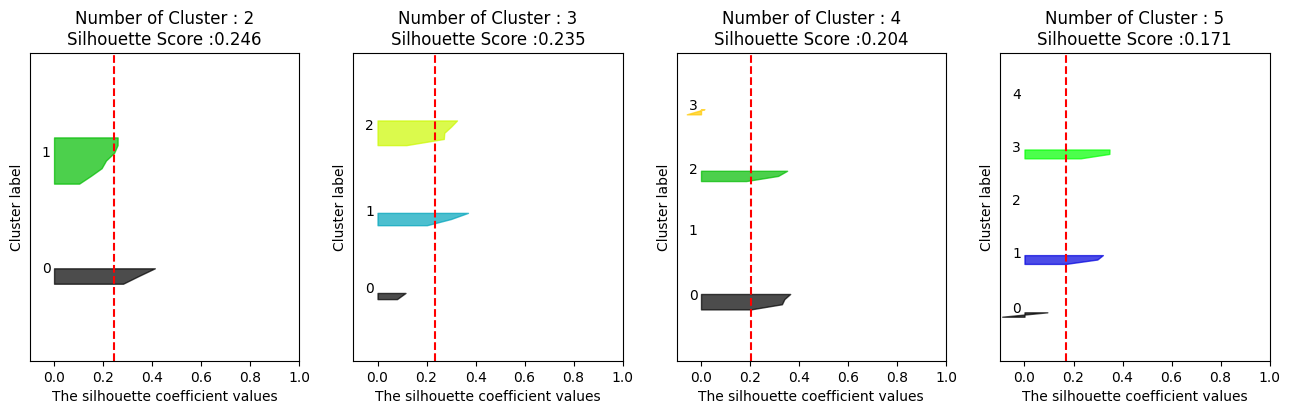

In [ ]:
visualize_silhouette([2,3,4,5], sales_pca_전통.iloc[:,1:49])

## 전체 열 PCA

In [ ]:
sales_pca_골목_2 = sales.iloc[:,1:3]
sales_pca_골목_2['상권_구분_코드_명'] = sales['상권_구분_코드_명']
sales_pca_골목_2 = sales_pca_골목_2[sales_pca_골목_2.상권_구분_코드_명 == 1]
sales_pca_골목_2.reset_index(inplace = True, drop = True)

sales_pca_골목_2.drop(['상권_구분_코드_명'], axis=1, inplace = True)

In [ ]:
sales_pca_골목_2

,상권_코드_명,총_매출_금액
0,건대입구역 1번,1.166689e+10
1,건대입구역 6번,6.656748e+10
2,광나루역 1번,1.770376e+10
3,광진경찰서,2.539555e+09
4,광진구청,8.663238e+09
5,광진정말공원,2.469154e+10
6,광진정보도서관,3.247321e+10
7,광진초등학교,9.738513e+09
8,구남초등학교,8.864691e+09
9,구의1동주민센터,3.362525e+10


In [ ]:
# MinMaxScaler 적용
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_pca_골목_2 = scaler.fit_transform(sales[sales.상권_구분_코드_명 == 1].iloc[:,50:66].reset_index(drop = True))
sales_pca_골목_2['총_매출_금액'] = scaler.fit_transform(pd.DataFrame(sales_pca_골목_2['총_매출_금액']))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 9)
pc = pca.fit_transform(scaled_pca_골목_2[:,:16])

#데이터프레임으로 만들어주며 PC로 변환한 값을 만들어준 뒤 cluster라는 새로운 행을 만듦.
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9'])
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.345281,0.445436,-0.022264,-0.047469,-0.004589,-0.048275,0.022726,0.070578,-0.061113
1,2.745103,0.888447,0.168277,-0.218752,0.034230,0.255105,-0.004767,-0.082949,0.008987
2,0.086516,-0.113335,0.011961,0.001870,-0.090659,0.009388,0.007599,0.052528,0.049757
3,-0.832935,0.047333,0.000158,0.000166,0.016293,0.019967,-0.010858,-0.016309,0.003758
4,-0.453685,0.201337,-0.102258,0.158310,-0.022769,0.062626,0.069205,0.020640,0.040732


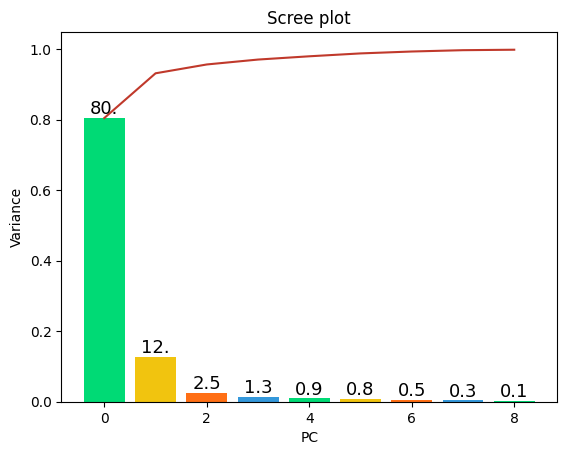

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db'])
    ax.plot(ind, cumvals, color = '#c0392b')

    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]),
        va = "bottom", ha = "center", fontsize = 13)

    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')

scree_plot(pca)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
sales_pca_골목_2['PCA1'] = pca.fit_transform(scaled_pca_골목_2[:,:16])

In [ ]:
# 업종 열과 결합
sales_pca_골목_2 = pd.concat([sales_pca_골목_2, sales[sales.상권_구분_코드_명 == 1].iloc[:,6:49].reset_index(drop = True)], axis = 1)

In [ ]:
sales_pca_골목_2

,상권_코드_명,총_매출_금액,PCA1,육류판매,애완동물,일식음식점,세탁소,일반의류,치킨전문점,한식음식점,...,네일숍,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원
0,건대입구역 1번,0.161559,-0.345281,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,건대입구역 6번,1.000000,2.745103,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,광나루역 1번,0.253754,0.086516,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,광진경찰서,0.022167,-0.832935,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,광진구청,0.115688,-0.453685,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,광진정말공원,0.360471,0.584699,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6,광진정보도서관,0.479313,0.913625,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,광진초등학교,0.132109,-0.425624,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,구남초등학교,0.118764,-0.477199,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,구의1동주민센터,0.496907,1.006078,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

sse = {}
for k in range(1,15):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300).fit(sales_pca_골목_2.iloc[:,1:])
  sse[k] = kmeans.inertia_

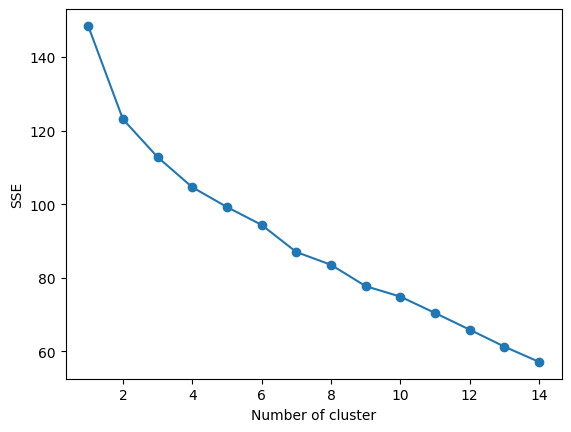

In [ ]:
plt.figure()
plt.scatter(list(sse.keys()), list(sse.values()))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show() # 군집 4개가 적당

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300).fit(scaled_pca_골목)
sales_pca_골목_2['label'] = kmeans.labels_

In [ ]:
sales_pca_골목_2

,상권_코드_명,총_매출_금액,PCA1,육류판매,애완동물,일식음식점,세탁소,일반의류,치킨전문점,한식음식점,...,네일숍,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원
0,건대입구역 1번,0.161559,-0.345281,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,건대입구역 6번,1.000000,2.745103,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,광나루역 1번,0.253754,0.086516,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,광진경찰서,0.022167,-0.832935,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,광진구청,0.115688,-0.453685,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,광진정말공원,0.360471,0.584699,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6,광진정보도서관,0.479313,0.913625,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,광진초등학교,0.132109,-0.425624,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,구남초등학교,0.118764,-0.477199,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,구의1동주민센터,0.496907,1.006078,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


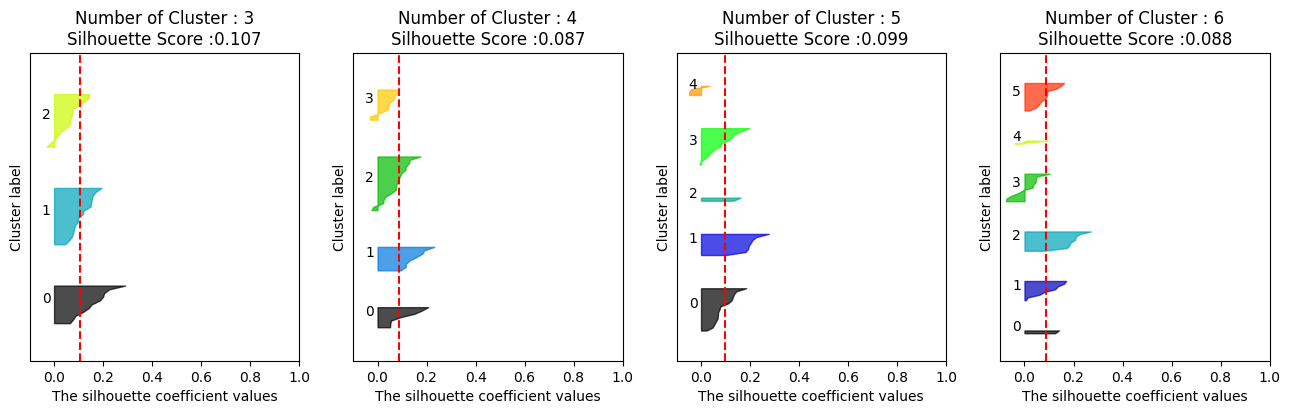

In [ ]:
visualize_silhouette([3,4,5,6], sales_pca_골목_2.iloc[:,1:49])

In [ ]:
sales_pca_골목_2[sales_pca_골목_2.label == 0]

,상권_코드_명,총_매출_금액,PCA1,육류판매,애완동물,일식음식점,세탁소,일반의류,치킨전문점,한식음식점,...,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원,label
0,건대입구역 1번,0.161559,-0.345281,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,광나루역 1번,0.253754,0.086516,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,광진경찰서,0.022167,-0.832935,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,광진구청,0.115688,-0.453685,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,광진초등학교,0.132109,-0.425624,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,구남초등학교,0.118764,-0.477199,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
11,국립정신건강센터,0.225961,-0.046010,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,군자역 4번,0.114962,-0.485130,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,군자역 5번,0.196495,-0.229714,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
14,능동우편취급국,0.262838,0.081551,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
sales_pca_골목_2[sales_pca_골목_2.label == 1]

,상권_코드_명,총_매출_금액,PCA1,육류판매,애완동물,일식음식점,세탁소,일반의류,치킨전문점,한식음식점,...,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원,label
5,광진정말공원,0.360471,0.584699,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
6,광진정보도서관,0.479313,0.913625,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
9,구의1동주민센터,0.496907,1.006078,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10,구의역 4번,0.664733,1.871686,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
20,성자초등학교,0.281782,0.221285,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
23,아차산역 1번,0.444456,0.873445,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
24,아차산역 5번,0.358317,0.598368,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
27,용마초등학교,0.452630,0.904931,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
28,자양4동주민센터,0.409274,0.716362,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
30,자양한강도서관,0.411053,0.709117,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
sales_pca_골목_2[sales_pca_골목_2.label == 2]

,상권_코드_명,총_매출_금액,PCA1,육류판매,애완동물,일식음식점,세탁소,일반의류,치킨전문점,한식음식점,...,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원,label
1,건대입구역 6번,1.0,2.745103,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,2


In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 2.0, min_samples = 2, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(sales_pca_골목_2.iloc[:,1:49])

In [ ]:
dbscan_labels

array([-1, -1,  0, -1,  1,  2, -1,  3, -1, -1, -1,  1, -1, -1,  4,  3,  2,
        3, -1,  2,  2, -1,  3,  2, -1,  0, -1,  2,  2,  5, -1, -1, -1,  4,
        5,  2, -1,  4, -1, -1,  2, -1])

In [ ]:
sales_pca_골목_2['label'] = dbscan_labels

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(sales_pca_골목_2.iloc[:,1:49], dbscan_labels, metric = 'euclidean')

0.2534375310975881

In [ ]:
sales_pca_골목_2[sales_pca_골목_2.label == 0]

,상권_코드_명,총_매출_금액,PCA1,육류판매,애완동물,일식음식점,세탁소,일반의류,치킨전문점,한식음식점,...,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원,label
0,건대입구역 1번,0.161559,-0.345281,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,광나루역 1번,0.253754,0.086516,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,광진경찰서,0.022167,-0.832935,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,광진구청,0.115688,-0.453685,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,광진초등학교,0.132109,-0.425624,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,구남초등학교,0.118764,-0.477199,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
11,국립정신건강센터,0.225961,-0.046010,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,군자역 4번,0.114962,-0.485130,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,군자역 5번,0.196495,-0.229714,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
14,능동우편취급국,0.262838,0.081551,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
sales_pca_골목_2[sales_pca_골목_2.label == 1]

,상권_코드_명,총_매출_금액,PCA1,육류판매,애완동물,일식음식점,세탁소,일반의류,치킨전문점,한식음식점,...,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원,label
5,광진정말공원,0.360471,0.584699,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
6,광진정보도서관,0.479313,0.913625,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
9,구의1동주민센터,0.496907,1.006078,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10,구의역 4번,0.664733,1.871686,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
20,성자초등학교,0.281782,0.221285,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
23,아차산역 1번,0.444456,0.873445,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
24,아차산역 5번,0.358317,0.598368,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
27,용마초등학교,0.452630,0.904931,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
28,자양4동주민센터,0.409274,0.716362,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
30,자양한강도서관,0.411053,0.709117,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
sales_pca_골목_2[sales_pca_골목_2.label == -1]

,상권_코드_명,총_매출_금액,PCA1,육류판매,애완동물,일식음식점,세탁소,일반의류,치킨전문점,한식음식점,...,의료기기,의약품,컴퓨터및주변장치판매,제과점,반찬가게,스포츠클럽,한의원,청과상,외국어학원,label
1,건대입구역 6번,1.0,2.745103,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,-1


In [ ]:
sales

,행정동명,상권_코드_명,총_매출_금액,대표_업종,대표_업종_매출_금액,대표_업종_비율,육류판매,애완동물,일식음식점,세탁소,...,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,상권_구분_코드_명
0,구의제3동,강변역(테크노마트),3.321523e+11,"['컴퓨터및주변장치판매', '전자상거래업', '핸드폰', '가전제품', '일반의류']",265838316888,80.035060,0,0,0,0,...,1778344703,1.462938e+11,9.856076e+10,1398831447,29746447479,5.526001e+10,6.455620e+10,5.663524e+10,3.725784e+10,0
1,화양동,건대입구역 1번,1.166689e+10,"['한식음식점', '호프-간이주점', '편의점', '치킨전문점', '노래방']",10540141878,90.342338,0,0,0,0,...,3395111351,6.457942e+09,4.067236e+09,156749198,4266045811,2.615671e+09,1.401982e+09,1.335441e+09,7.492886e+08,1
2,자양제4동,건대입구역 6번,6.656748e+10,"['중식음식점', '반찬가게', '편의점', '한식음식점', '의약품']",48880654750,73.430231,0,0,0,0,...,13051167217,3.662941e+10,2.674311e+10,548767966,19643661749,1.584273e+10,1.092390e+10,1.014919e+10,6.264271e+09,1
3,화양동,건대입구역(건대),3.524325e+11,"['한식음식점', '커피-음료', '일반의원', '일반의류', '호프-간이주점']",199745066665,56.676113,0,0,0,0,...,52309947213,1.555370e+11,1.851034e+11,9422322974,138253740433,7.910771e+10,4.987117e+10,4.337508e+10,2.061029e+10,0
4,광장동,광나루역 1번,1.770376e+10,"['한식음식점', '편의점', '중식음식점', '치과의원', '커피-음료']",13630875676,76.994222,0,0,0,0,...,2021624754,1.013996e+10,6.160345e+09,101322474,1813699794,2.662737e+09,4.041911e+09,4.477682e+09,3.202955e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,구의제3동,푸른동산공원,6.979311e+09,"['편의점', '치과의원', '육류판매', '분식전문점', '슈퍼마켓']",4991983374,71.525450,1,0,0,0,...,785036232,3.555122e+09,3.195968e+09,83493294,888719048,1.194932e+09,1.617479e+09,1.796380e+09,1.170086e+09,1
57,화양동,한아름시장,6.788171e+09,"['일반의원', '분식전문점', '치과의원', '스포츠클럽', '일반교습학원']",5135408297,75.652311,0,0,0,0,...,478710635,3.634647e+09,3.073858e+09,154557151,2594093421,1.289808e+09,7.728886e+08,1.223820e+09,6.733370e+08,2
58,중곡제4동,해오름공원,1.138369e+10,"['편의점', '한식음식점', '의약품', '슈퍼마켓', '일반의원']",7015156358,61.624603,0,0,0,0,...,970639426,5.791566e+09,5.341118e+09,25146557,1134301796,2.205770e+09,2.160780e+09,3.073610e+09,2.533076e+09,1
59,화양동,화양사거리,2.838047e+10,"['편의점', '한식음식점', '반찬가게', '여관', '세탁소']",23931152625,84.322621,0,0,0,1,...,6138840331,1.602489e+10,1.001184e+10,568765549,10184242017,6.457951e+09,3.643977e+09,3.543810e+09,1.637981e+09,1


In [ ]:
cluster0 = pd.merge(sales.iloc[:,1:4], sales_pca_골목_2[sales_pca_골목_2.label == 0], on = '상권_코드_명', how = 'inner').iloc[:,:4]
cluster0

,상권_코드_명,총_매출_금액_x,대표_업종,총_매출_금액_y
0,건대입구역 1번,1.166689e+10,"['한식음식점', '호프-간이주점', '편의점', '치킨전문점', '노래방']",0.161559
1,광나루역 1번,1.770376e+10,"['한식음식점', '편의점', '중식음식점', '치과의원', '커피-음료']",0.253754
2,광진경찰서,2.539555e+09,"['편의점', '분식전문점', '일반의류', '커피-음료', '육류판매']",0.022167
3,광진구청,8.663238e+09,"['편의점', '한식음식점', '커피-음료', '패스트푸드점', '자동차수리']",0.115688
4,광진초등학교,9.738513e+09,"['편의점', '슈퍼마켓', '일반교습학원', '한식음식점', '미용실']",0.132109
5,구남초등학교,8.864691e+09,"['한식음식점', '편의점', '커피-음료', '한의원', '일식음식점']",0.118764
6,국립정신건강센터,1.588389e+10,"['한식음식점', '편의점', '자동차수리', '일반교습학원', '커피-음료']",0.225961
7,군자역 4번,8.615755e+09,"['일반교습학원', '편의점', '철물점', '한식음식점', '예술학원']",0.114962
8,군자역 5번,1.395446e+10,"['한식음식점', '육류판매', '편의점', '일반의류', '치킨전문점']",0.196495
9,능동우편취급국,1.829857e+10,"['편의점', '한식음식점', '반찬가게', '슈퍼마켓', '자동차수리']",0.262838


In [ ]:
pd.merge(sales.iloc[:,1:4], sales_pca_골목_2[sales_pca_골목_2.label == 1], on = '상권_코드_명', how = 'inner').iloc[:,:4]

,상권_코드_명,총_매출_금액_x,대표_업종,총_매출_금액_y
0,광진정말공원,2.469154e+10,"['한식음식점', '일반의원', '편의점', '의약품', '치과의원']",0.360471
1,광진정보도서관,3.247321e+10,"['한식음식점', '일반의류', '편의점', '운동/경기용품', '커피-음료']",0.479313
2,구의1동주민센터,3.362525e+10,"['호프-간이주점', '한식음식점', '슈퍼마켓', '애완동물', '편의점']",0.496907
3,구의역 4번,4.461443e+10,"['편의점', '한식음식점', '화장품', '일반의류', '육류판매']",0.664733
4,성자초등학교,1.953902e+10,"['슈퍼마켓', '한식음식점', '편의점', '의약품', '시계및귀금속']",0.281782
5,아차산역 1번,3.019082e+10,"['한식음식점', '육류판매', '편의점', '반찬가게', '일반의원']",0.444456
6,아차산역 5번,2.455047e+10,"['의료기기', '가구', '일반의류', '편의점', '미용실']",0.358317
7,용마초등학교,3.072600e+10,"['의약품', '한식음식점', '슈퍼마켓', '자동차수리', '일반의원']",0.452630
8,자양4동주민센터,2.788708e+10,"['반찬가게', '편의점', '한식음식점', '의약품', '육류판매']",0.409274
9,자양한강도서관,2.800362e+10,"['한식음식점', '편의점', '조명용품', '호프-간이주점', '의약품']",0.411053
